<img src="Structure_FWI.png" width="700">

### 1. Import Data and Required Packages

In [95]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline  
import seaborn as sns 
import warnings
warnings.filterwarnings('ignore')
df = pd.read_csv('Algerian_forest_fires_dataset_UPDATE.csv',header=1)

Drop Empty Rows

In [96]:
df.drop([122,123,124],axis=0,inplace=True)
df.reset_index(inplace=True)
#df.drop(['index'],axis=1,inplace=True)

Set the 0 and 1 for Bajaia and Sidi-Bel Abbes for Region Column

In [97]:
df.loc[:122,'Region']= 0 #'Bejaia'
df.loc[122:,'Region'] = 1 #'Sidi-Bel Abbes'

Drop Unnecessary index Column

In [98]:
df.drop(['index'],axis=1,inplace=True)

In [99]:
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0.0
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire,0.0
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0.0
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire,0.0
4,5,6,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire,0.0


In [100]:
df.columns

Index(['day', 'month', 'year', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes', 'Region'],
      dtype='object')

### Change datatype of column day,month,Temperature,RH,Ws,Region as Integer datatype.

In [101]:
list = ['day','month','Temperature','RH','Ws','Region']
for i in list:
    df[i] = df[i].apply(np.int64)

### Change datatype of column 'Rain','FFMC','DMC','DC','ISI','BUI','FWI' as Float datatype.

In [65]:
list1 = ['Rain','FFMC','DMC','DC','ISI','BUI','FWI']
for j in list1:
    df[j] = df[j].apply(np.float64)

### Numerical Features

In [66]:
num_feat = [num for num in df.columns if df[num].dtypes !='O']
print('We have {} numerical features are {}'.format(len(num_feat),num_feat))

We have 13 numerical features are ['day', 'month', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC', 'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Region']


### Categorical Features

In [67]:
cat_feat = [cat for cat in df.columns if df[cat].dtypes == 'O']
cat_feat

['year', 'Classes']

In [68]:
df.describe()

,day,month,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Region
count,244.000000,244.000000,244.000000,244.000000,244.000000,244.000000,244.000000,244.000000,244.000000,244.000000,244.000000,244.000000,244.000000
mean,15.754098,7.500000,32.172131,61.938525,15.504098,0.760656,77.887705,14.673361,49.288115,4.759836,16.673361,7.049180,0.500000
std,8.825059,1.112961,3.633843,14.884200,2.810178,1.999406,14.337571,12.368039,47.619662,4.154628,14.201648,7.428366,0.501028
min,1.000000,6.000000,22.000000,21.000000,6.000000,0.000000,28.600000,0.700000,6.900000,0.000000,1.100000,0.000000,0.000000
25%,8.000000,7.000000,30.000000,52.000000,14.000000,0.000000,72.075000,5.800000,13.275000,1.400000,6.000000,0.700000,0.000000
50%,16.000000,7.500000,32.000000,63.000000,15.000000,0.000000,83.500000,11.300000,33.100000,3.500000,12.450000,4.450000,0.500000
75%,23.000000,8.000000,35.000000,73.250000,17.000000,0.500000,88.300000,20.750000,68.150000,7.300000,22.525000,11.375000,1.000000
max,31.000000,9.000000,42.000000,90.000000,29.000000,16.800000,96.000000,65.900000,220.400000,19.000000,68.000000,31.100000,1.000000


In [69]:
df.dtypes

day              int64
month            int64
year            object
Temperature      int64
RH               int64
Ws               int64
Rain           float64
FFMC           float64
DMC            float64
DC             float64
ISI            float64
BUI            float64
FWI            float64
Classes         object
Region           int64
dtype: object

### Check the Null values

In [70]:
df.isnull().sum()

day            0
month          0
year           0
Temperature    0
RH             0
Ws             0
Rain           0
FFMC           0
DMC            0
DC             0
ISI            0
BUI            0
FWI            0
Classes        0
Region         0
dtype: int64

### Check Information and datatypes all column

In [71]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          244 non-null    int64  
 1   month        244 non-null    int64  
 2   year         244 non-null    object 
 3   Temperature  244 non-null    int64  
 4   RH           244 non-null    int64  
 5   Ws           244 non-null    int64  
 6   Rain         244 non-null    float64
 7   FFMC         244 non-null    float64
 8   DMC          244 non-null    float64
 9   DC           244 non-null    float64
 10  ISI          244 non-null    float64
 11  BUI          244 non-null    float64
 12  FWI          244 non-null    float64
 13  Classes      244 non-null    object 
 14  Region       244 non-null    int64  
dtypes: float64(7), int64(6), object(2)
memory usage: 28.7+ KB


### Check Skewness

In [72]:
df.skew()

day            0.002806
month          0.000000
year           0.000000
Temperature   -0.196309
RH            -0.237964
Ws             0.545881
Rain           4.579071
FFMC          -1.325633
DMC            1.527652
DC             1.479042
ISI            1.126950
BUI            1.458466
FWI            1.143243
Region         0.000000
dtype: float64

* If skewness is less than −1 or greater than +1, the distribution is highly skewed.
* If skewness is between −1 and −½ or between +½ and +1, the distribution is moderately skewed.
* If skewness is between −½ and +½, the distribution is approximately symmetric.

### Check Kurtosis

In [73]:
df.kurtosis()

day            -1.198650
month          -1.345988
year            0.000000
Temperature    -0.154310
RH             -0.530328
Ws              2.602156
Rain           25.942123
FFMC            1.055208
DMC             2.487598
DC              1.614097
ISI             0.829860
BUI             1.979913
FWI             0.655316
Region         -2.016598
dtype: float64

* A normal distribution has kurtosis exactly 3 (excess kurtosis exactly 0). Any distribution with kurtosis ≈3 (excess ≈0) is called mesokurtic.
* A distribution with kurtosis <3 (excess kurtosis <0 ) is called platykurtic. Compared to a normal distribution, its tails are shorter and thinner, and often its central peak is lower and broader.
* A distribution with kurtosis >3 (excess kurtosis >0) is called leptokurtic. Compared to a normal distribution, its tails are longer and fatter, and often its central peak is higher and sharper.

### Check Inter Quartile Range(IQR)

In [74]:
for col in num_feat:
    Q1 = df[col].quantile(.25)
    Q3 = df[col].quantile(.75)
    IQR = Q3 - Q1
    print('IQR of %s : %d' %(col,IQR))

IQR of day : 15
IQR of month : 1
IQR of Temperature : 5
IQR of RH : 21
IQR of Ws : 3
IQR of Rain : 0
IQR of FFMC : 16
IQR of DMC : 14
IQR of DC : 54
IQR of ISI : 5
IQR of BUI : 16
IQR of FWI : 10
IQR of Region : 1


### Check Range

In [75]:
for col in num_feat:
    range = df[col].max() - df[col].min()
    print('range of %s : %d'%(col,range))

range of day : 30
range of month : 3
range of Temperature : 20
range of RH : 69
range of Ws : 23
range of Rain : 16
range of FFMC : 67
range of DMC : 65
range of DC : 213
range of ISI : 19
range of BUI : 66
range of FWI : 31
range of Region : 1


## Univariate Analysis

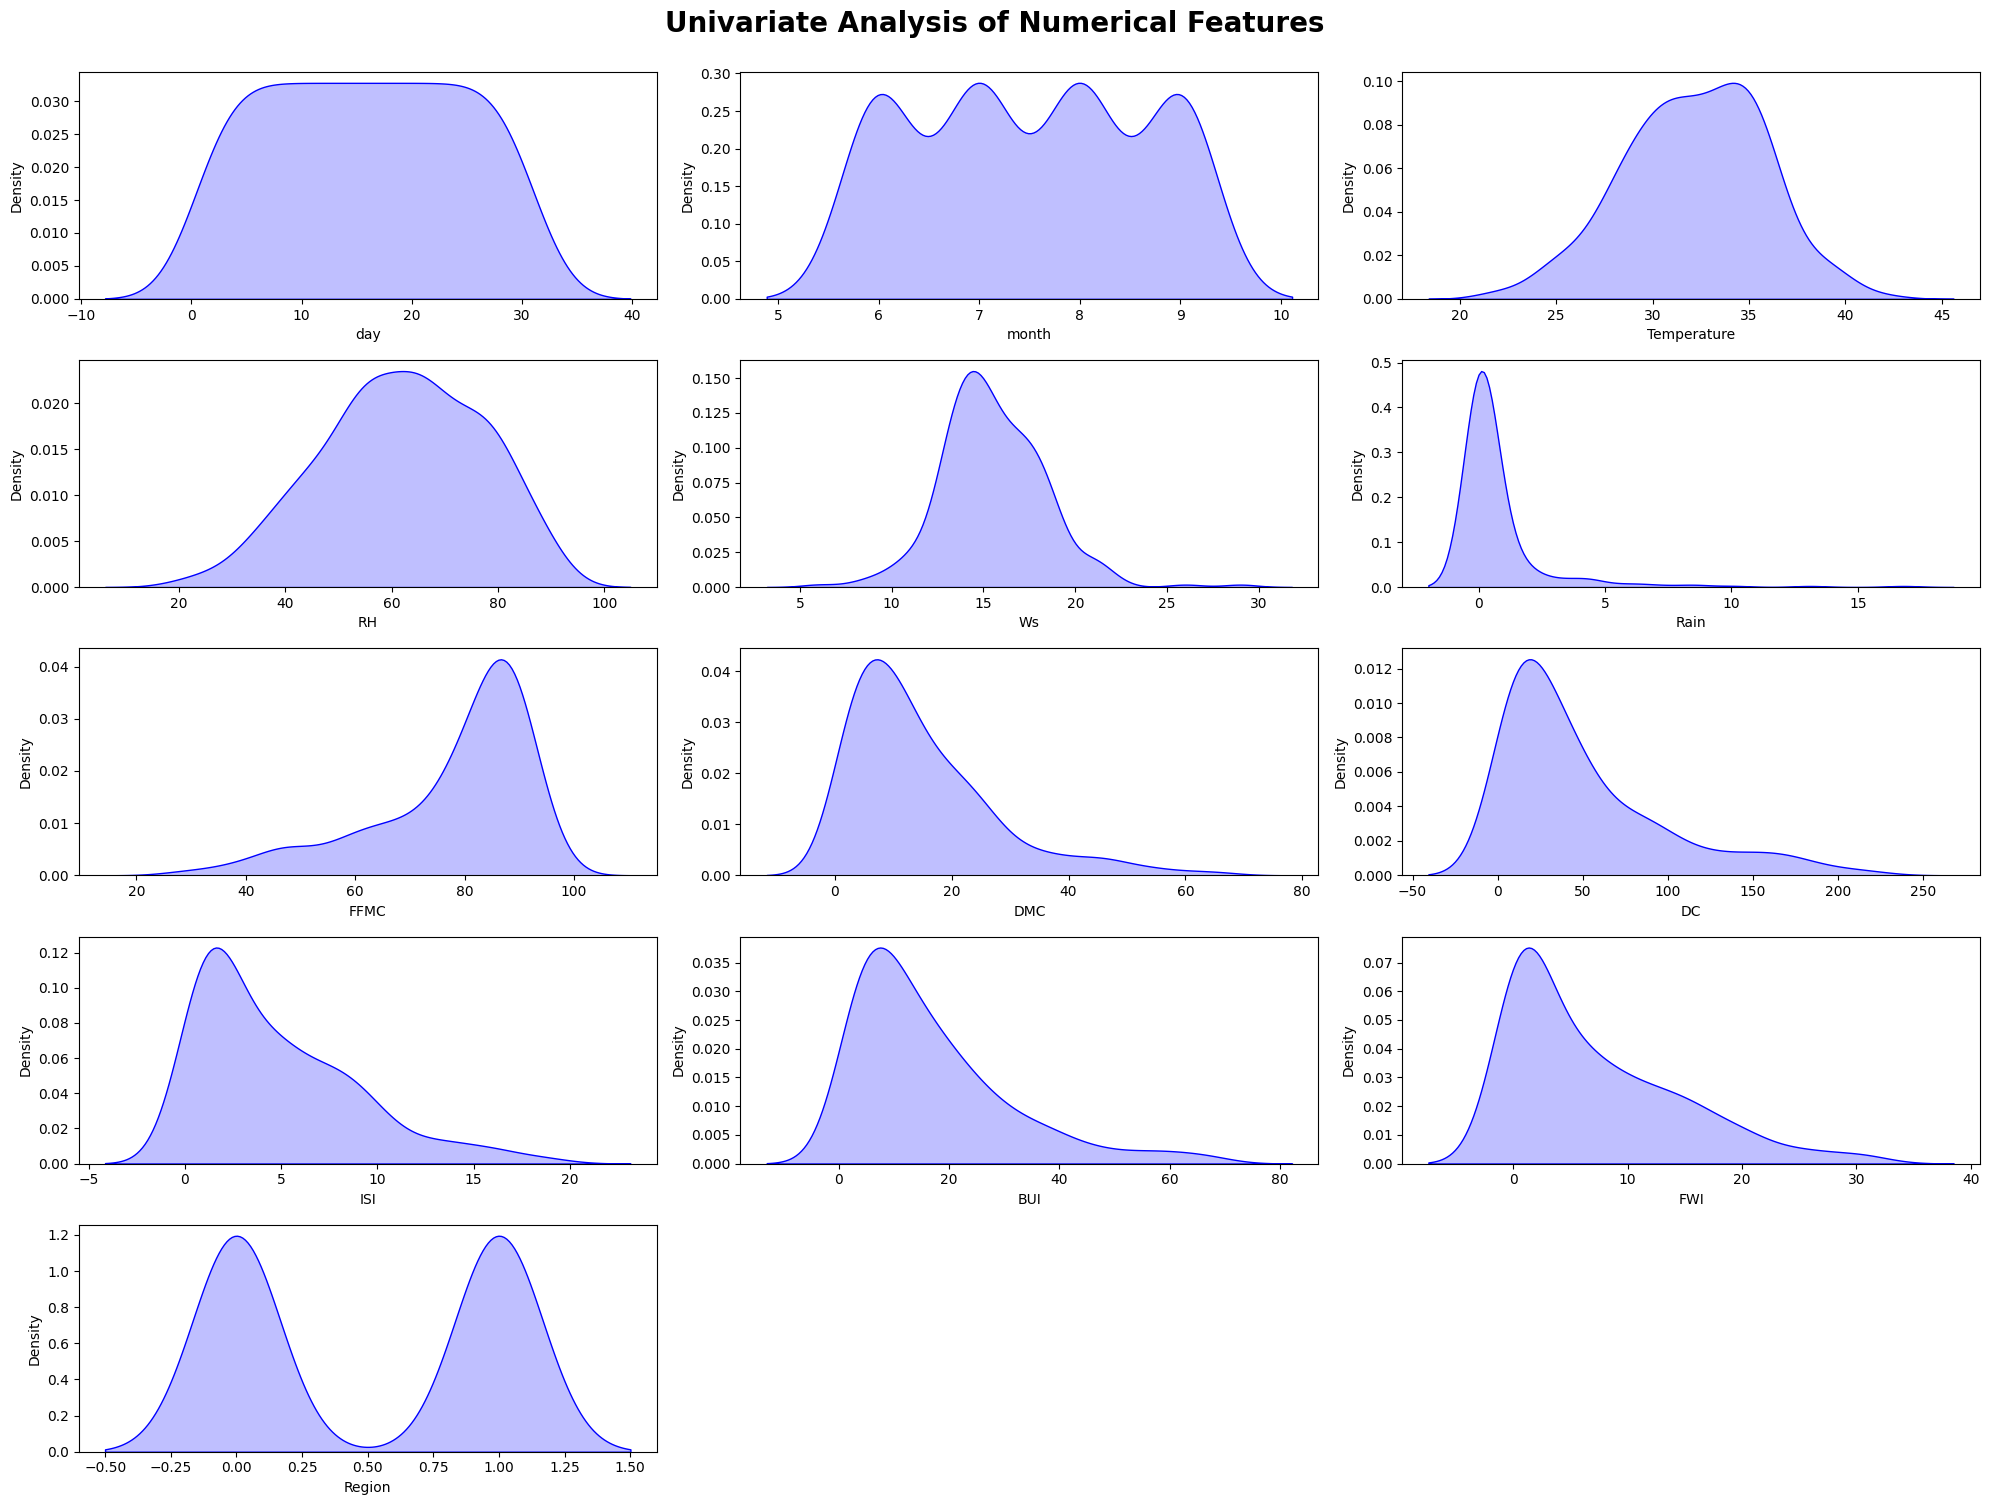

In [76]:
fig = plt.figure(figsize = (20,15))
plt.suptitle('Univariate Analysis of Numerical Features',fontsize=20,fontweight='bold',y=1.)
for i in enumerate(num_feat):
    plt.subplot(5,3,i[0]+1)
    sns.kdeplot(x=df[num_feat[i[0]]],shade='True',color='b')
    plt.xlabel(num_feat[i[0]])
    plt.tight_layout()

**Observation:**
1. Rain feature has outliers
2. Rain,DMC,DC,ISI,BUI and FWI are Right Skewed or Positivaly Skewed.
3. Region and Temperature are Normally Distributed.
4. FFMC is Negatively Skewed.

## Multivariate Analysis

In [77]:
df.corr()

,day,month,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Region
day,1.000000e+00,2.232788e-17,0.095772,-0.074209,0.047001,-0.112265,0.224032,0.491571,0.527929,0.179301,0.517224,0.350234,4.662229e-16
month,2.232788e-17,1.000000e+00,-0.059017,-0.037884,-0.041447,0.035322,0.015577,0.068178,0.127672,0.063545,0.085567,0.081732,-9.586232e-17
Temperature,9.577222e-02,-5.901677e-02,1.000000,-0.654443,-0.278132,-0.326786,0.677491,0.483105,0.370498,0.605971,0.456415,0.566839,2.734961e-01
RH,-7.420934e-02,-3.788419e-02,-0.654443,1.000000,0.236084,0.222968,-0.645658,-0.405133,-0.220330,-0.688268,-0.349685,-0.580457,-4.064239e-01
Ws,4.700086e-02,-4.144673e-02,-0.278132,0.236084,1.000000,0.170169,-0.163255,-0.001246,0.076245,0.012245,0.030303,0.033957,-1.768290e-01
Rain,-1.122654e-01,3.532207e-02,-0.326786,0.222968,0.170169,1.000000,-0.544045,-0.288548,-0.296804,-0.347862,-0.299409,-0.324755,-4.108006e-02
FFMC,2.240321e-01,1.557668e-02,0.677491,-0.645658,-0.163255,-0.544045,1.000000,0.602391,0.503910,0.740751,0.590251,0.691430,2.246798e-01
DMC,4.915710e-01,6.817778e-02,0.483105,-0.405133,-0.001246,-0.288548,0.602391,1.000000,0.875358,0.678355,0.982206,0.875191,1.910937e-01
DC,5.279285e-01,1.276719e-01,0.370498,-0.220330,0.076245,-0.296804,0.503910,0.875358,1.000000,0.503919,0.941672,0.737041,-8.148947e-02
ISI,1.793008e-01,6.354476e-02,0.605971,-0.688268,0.012245,-0.347862,0.740751,0.678355,0.503919,1.000000,0.641351,0.922422,2.662977e-01


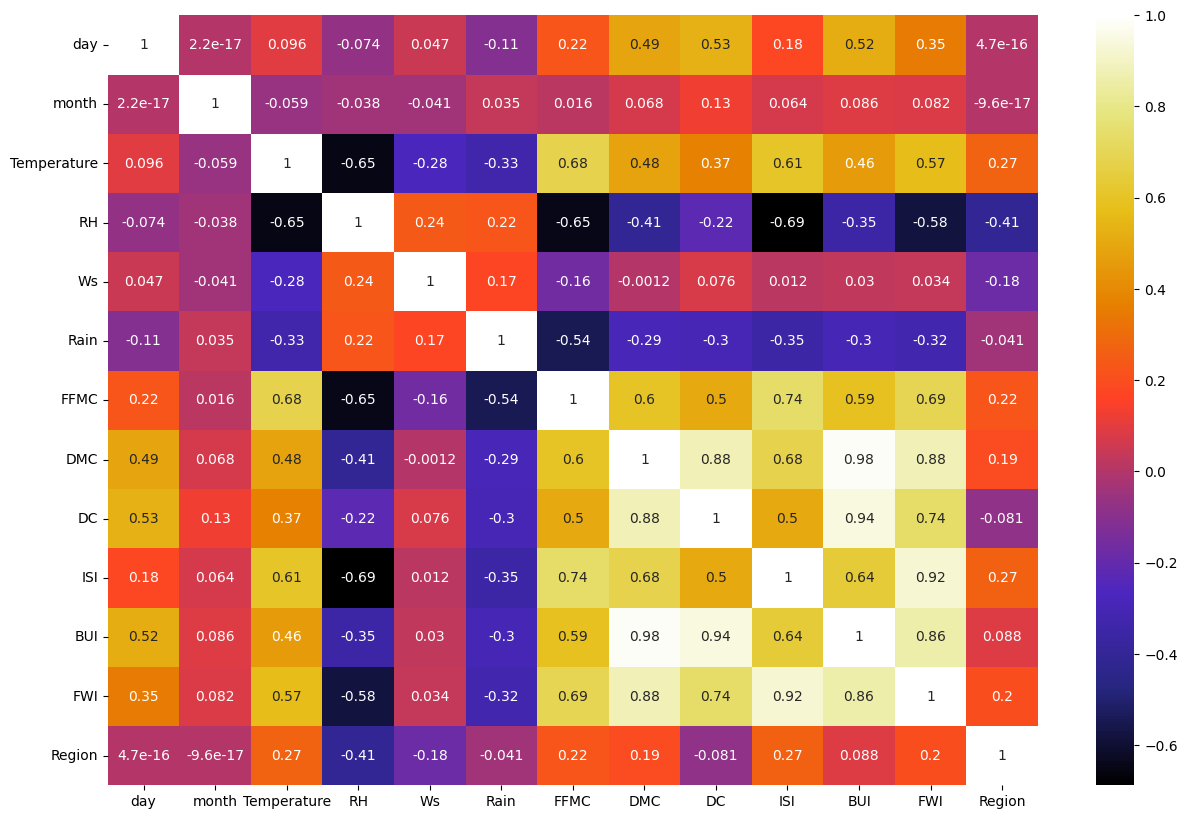

In [78]:
plt.figure(figsize = (15,10))
sns.heatmap(df.corr(), cmap="CMRmap", annot=True)
plt.show()

**Observation** 
1. The Initial Spread Index is 0.74 with FFMC.
2. The BUI is 0.98 and 0.94 with DMC and DC.
3. The FWI is 0.86 and 0.92 with BUI and ISI.

In [79]:
rain = df.groupby(['Ws','day','month'])['Rain'].max()
rain =rain.to_frame().sort_values('Rain',ascending=False)[0:10]
rain

,,,Rain
Ws,day,month,
21,31,8,16.8
22,3,6,13.1
15,2,9,10.1
10,18,6,8.7
26,14,9,8.3
17,1,9,7.2
14,6,9,6.5
18,8,7,6.0
21,25,9,5.8


**Observation** 
1. Rain was 16.8 mm at 21 km/h wind speed on 31 August.

In [80]:
temper = df.groupby(['Temperature'])['FFMC'].max()
temper =temper.to_frame().sort_values('FFMC',ascending=False)[0:10]
temper

,FFMC
Temperature,
42,96.0
37,94.3
40,94.2
33,93.9
36,93.9
38,93.8
39,93.7
34,92.5
35,92.2


**Observation** 
* Temperature increases FFMC also increases.
* FFMC 96 at 42 Temperature.

In [81]:
fwi = df.groupby(['Temperature'])['FWI'].max()
fwi =fwi.to_frame().sort_values('FWI',ascending=False)[0:10]
fwi

,FWI
Temperature,
34,31.1
33,30.3
35,30.2
36,30.0
37,26.3
32,25.4
42,24.0
40,21.6
38,20.9


**Observation** 
* FWI index high(31.1) at Temperature 34 celsius. 

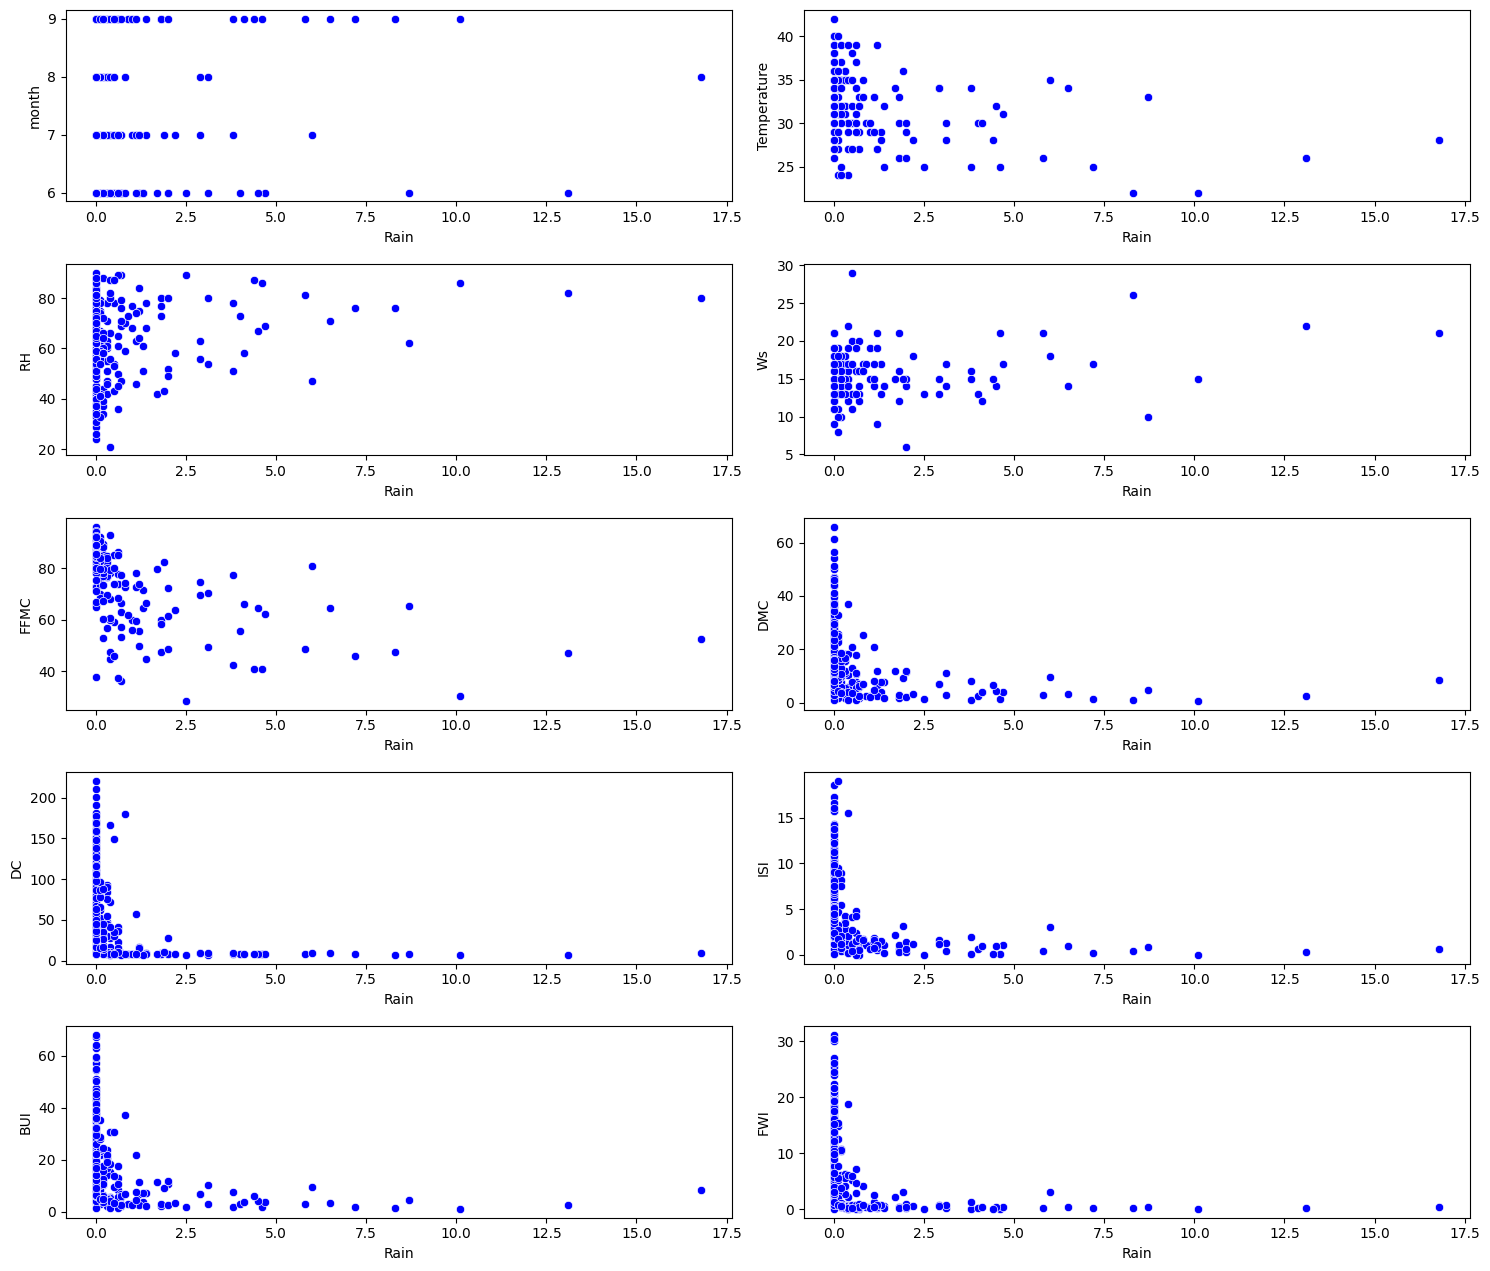

In [82]:
lst1 = ['month','Temperature','RH','Ws','FFMC','DMC','DC','ISI','BUI','FWI']
fig = plt.figure(figsize=(15, 20))
for i in enumerate(lst1):
    ax = plt.subplot(8, 2, i[0]+1)
    sns.scatterplot(data= df ,x='Rain', y=lst1[i[0]], color='b')
    plt.tight_layout()

**Observation** 
* Relative Humidity and Wind Speed increased Rain increased.
* Rain decreases DMC,DC,BUI,FWI increases. 

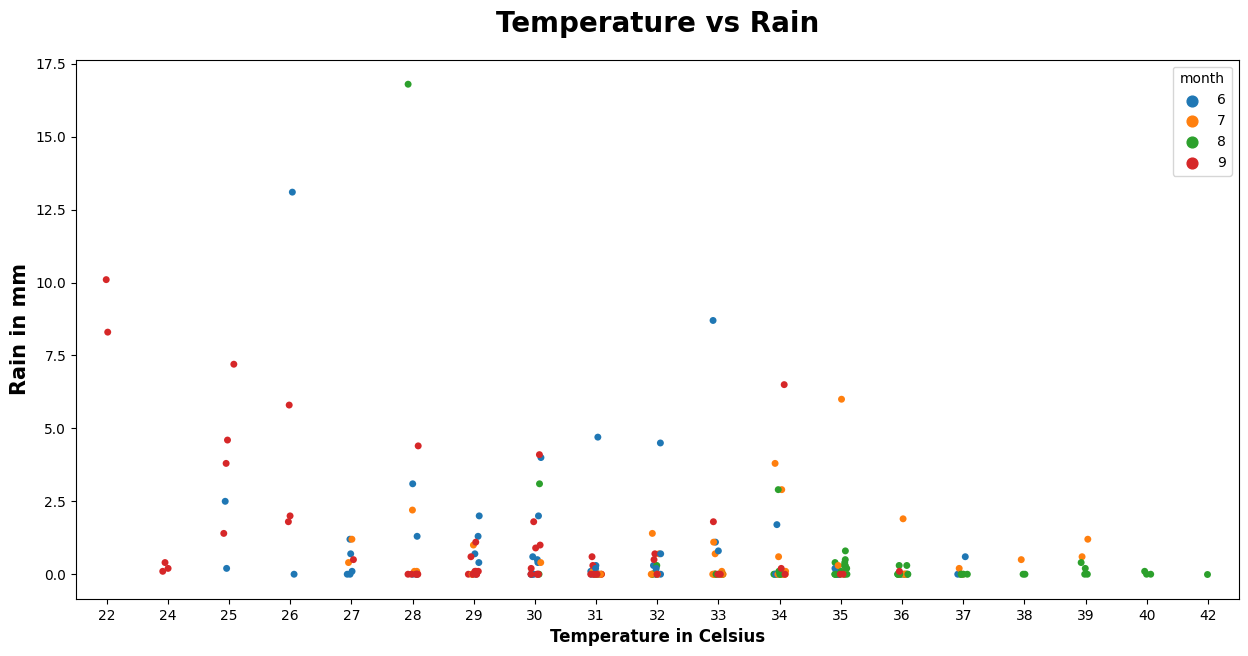

In [83]:
plt.subplots(figsize=(15,7))
sns.stripplot(x='Temperature', y='Rain', data=df,hue='month')
plt.title("Temperature vs Rain", weight="bold",fontsize=20, pad=20)
plt.ylabel("Rain in mm", weight="bold", fontsize=15)
plt.xlabel("Temperature in Celsius", weight="bold", fontsize=12)
plt.show()

**Observation** 
* Temperature increased Rain decreased.
* In August 2012 temperature was high (39 to 41 celsius).

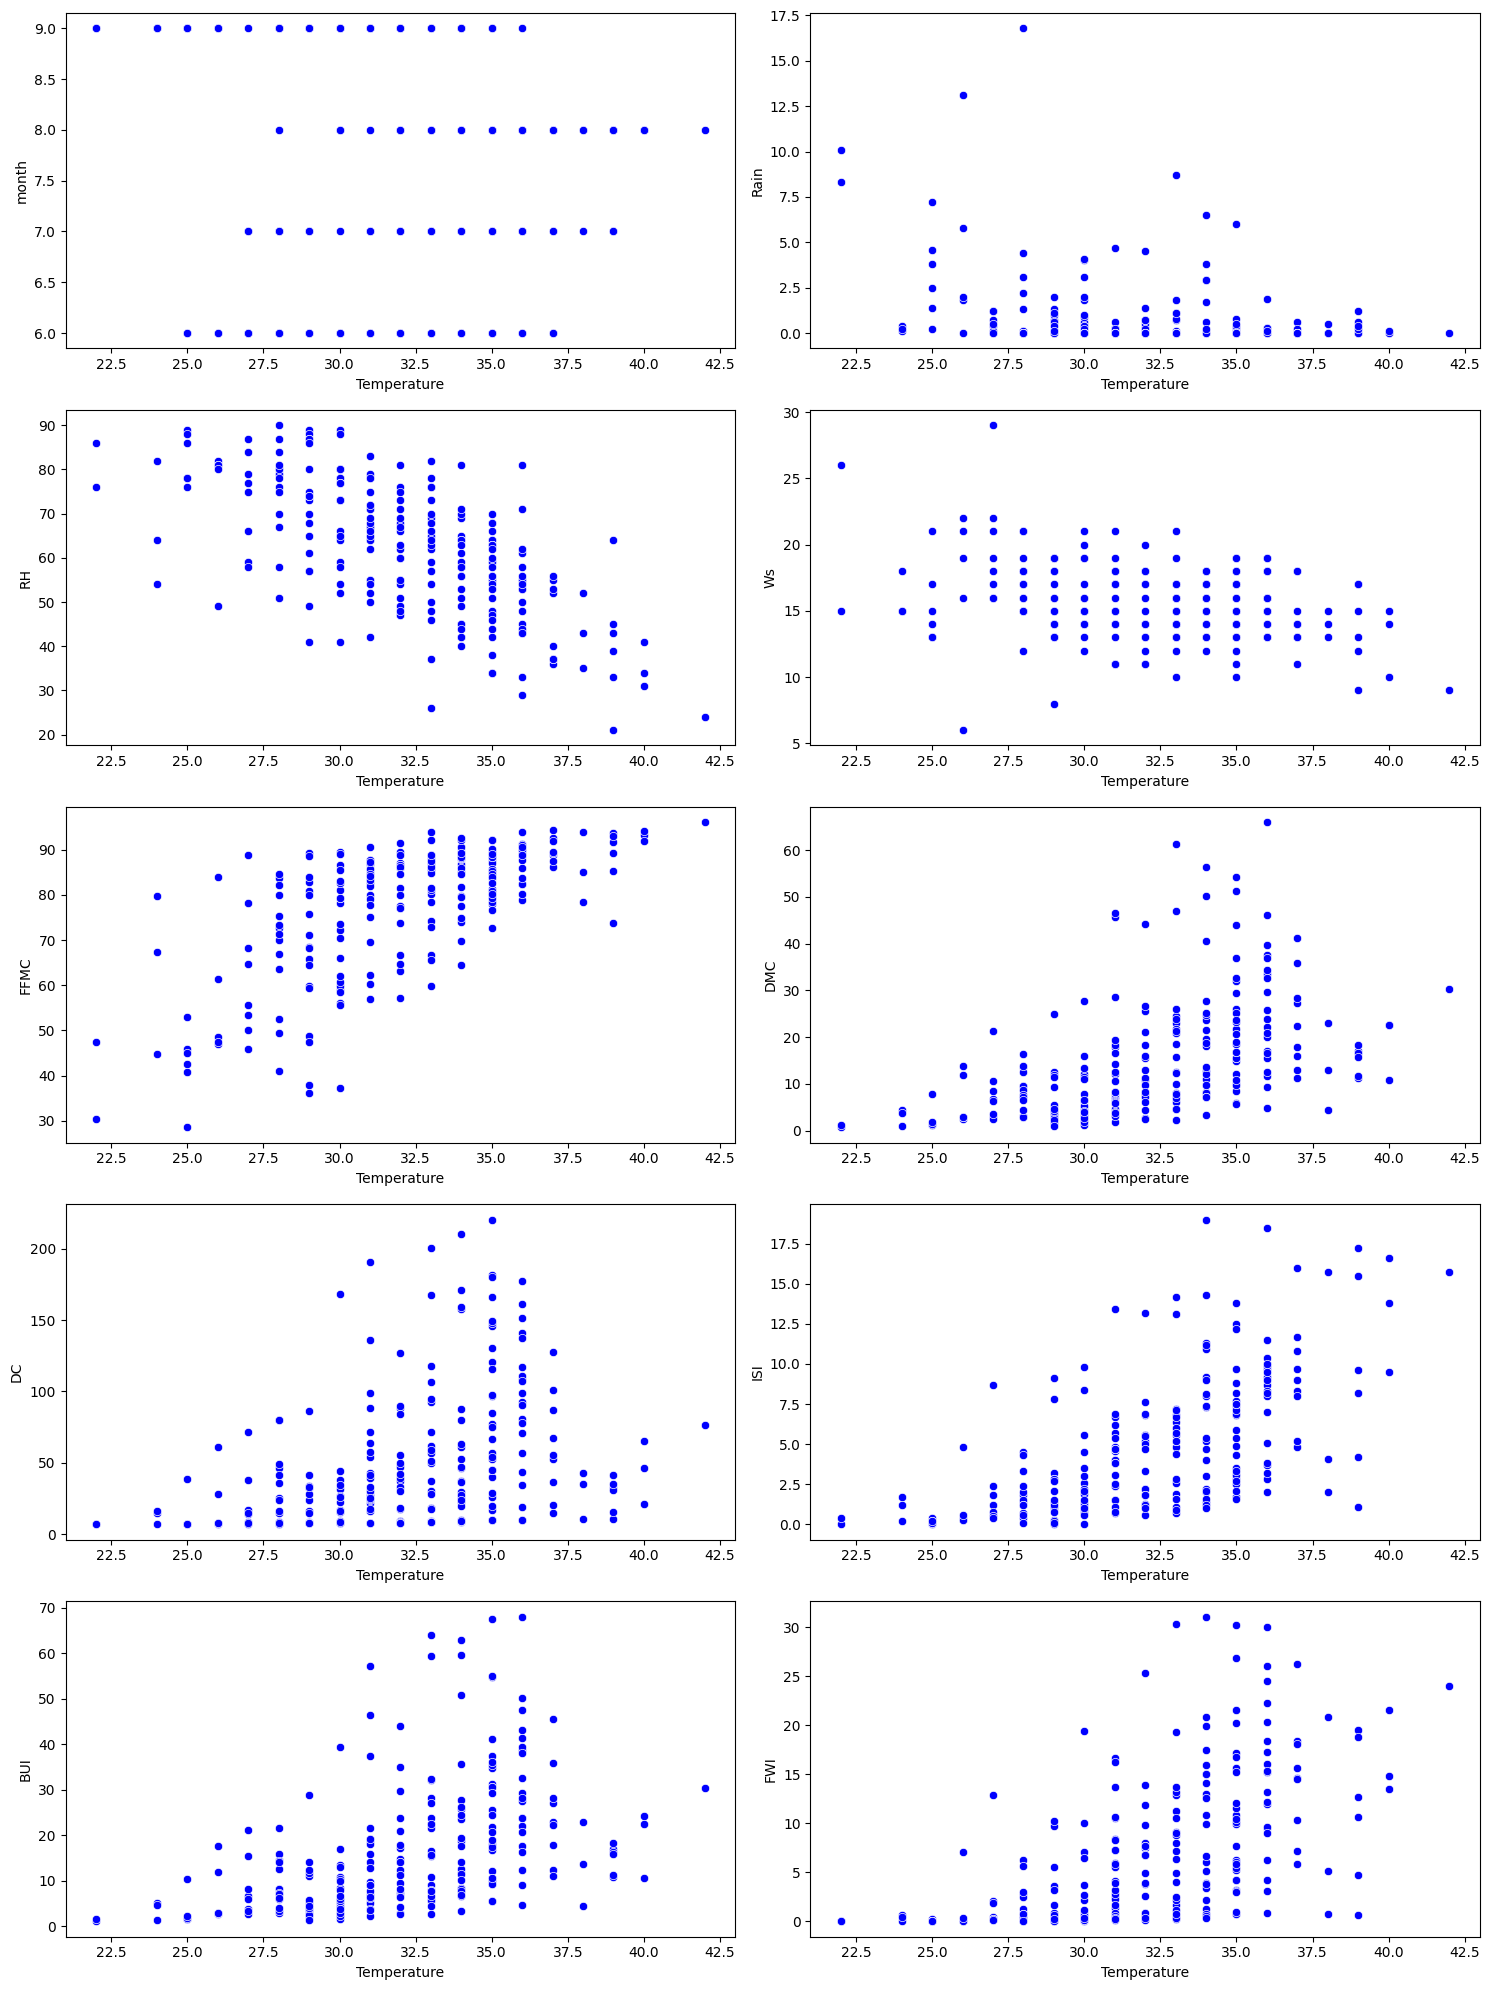

In [84]:
lst2 = ['month','Rain','RH','Ws','FFMC','DMC','DC','ISI','BUI','FWI']
fig = plt.figure(figsize=(15, 20))
for i in enumerate(lst2):
    ax = plt.subplot(5, 2, i[0]+1)
    sns.scatterplot(data= df ,x='Temperature', y=lst2[i[0]], color='b')
    plt.tight_layout()

**Observation**
* Temperature increased Fine Fuel Moisture code high. 
* Temperature High DC,DMC, ISI,FWI index increases and Relative Humidity decreases.

In [85]:
Isi = df.groupby('FFMC').ISI.max()
Isi = Isi.to_frame().sort_values('ISI',ascending=False)
Isi.head(10)

,ISI
FFMC,
88.3,19.0
93.9,18.5
93.7,17.2
94.2,16.6
94.3,16.0
96.0,15.7
93.8,15.7
93.0,15.5
92.1,14.3


**Observation**
* ISI index was 19 at 88.3 FFMC.

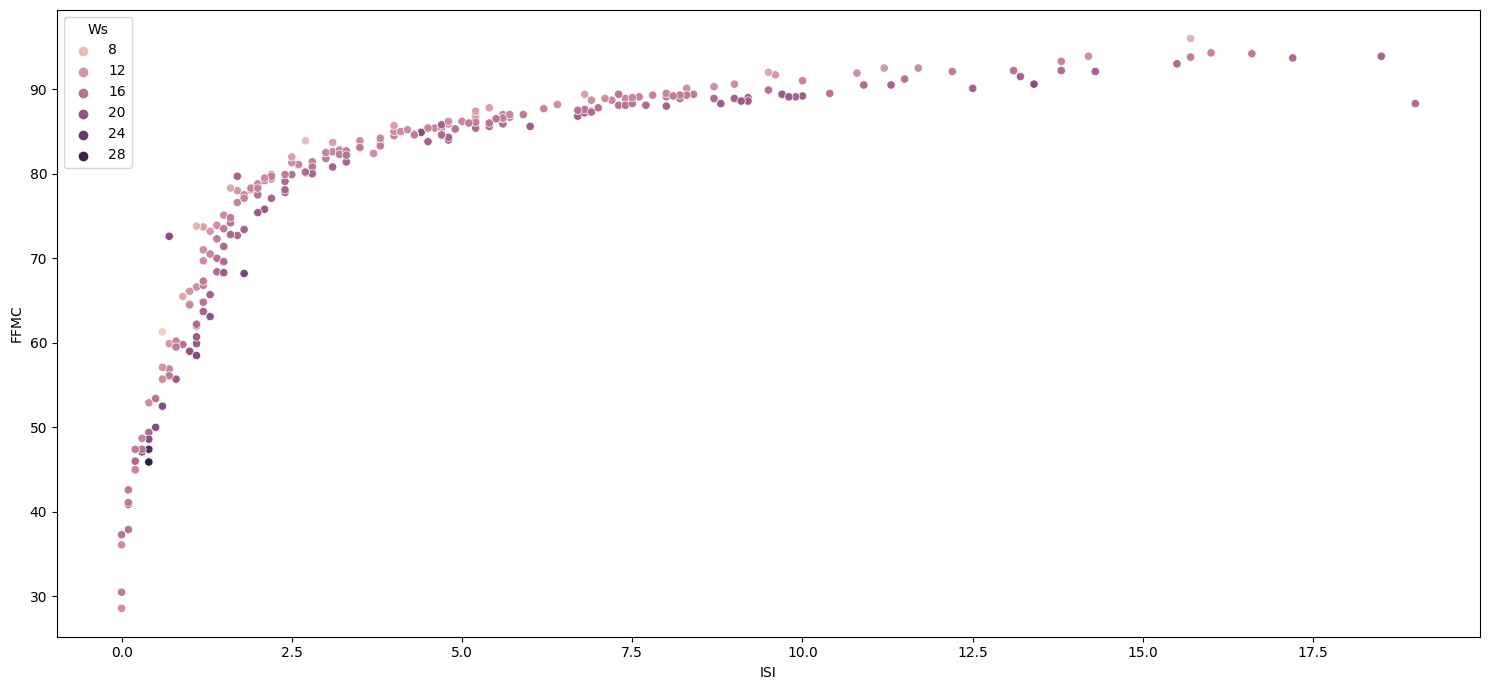

In [86]:
fig = plt.figure(figsize=(15,7))
sns.scatterplot(data=df, x="ISI", y="FFMC",hue='Ws')
plt.tight_layout()

**Observation** 
* ISI index increased with FFMC code increases.

In [87]:
df.groupby('Classes').FWI.max()

Classes
fire        31.1
not fire     6.1
Name: FWI, dtype: float64

**Observation** 
* The Class fire was at 31.1 and not fire at 6.1 FWI index.



### Check T-Test

In [88]:
import researchpy as rp
rp.ttest(group1= df['FWI'][df['Classes'] == 'fire'], group1_name= "fire",
         group2= df['FWI'][df['Classes'] == 'not fire'], group2_name= "not fire")

(   Variable      N       Mean        SD        SE  95% Conf.   Interval
 0      fire  138.0  11.723188  6.800422  0.578890  10.578473  12.867904
 1  not fire  106.0   0.964151  1.127592  0.109521   0.746990   1.181312
 2  combined  244.0   7.049180  7.428366  0.475552   6.112449   7.985911,
                 Independent t-test   results
 0  Difference (fire - not fire) =    10.7590
 1            Degrees of freedom =   242.0000
 2                             t =    16.1122
 3         Two side test p value =     0.0000
 4        Difference < 0 p value =     1.0000
 5        Difference > 0 p value =     0.0000
 6                     Cohen's d =     2.0809
 7                     Hedge's g =     2.0745
 8                Glass's delta1 =     1.5821
 9              Point-Biserial r =     0.7194)

In [89]:
import scipy.stats as stats
T,p_value = stats.ttest_ind(df['FWI'][df['Classes'] == 'fire'],
                            df['FWI'][df['Classes'] == 'not fire'])
print(T,p_value)

16.11218344258666 3.540842018319088e-40


In [90]:
if p_value < 0.05:   
    print(" We are rejecting null hypothesis")
else:
    print("We are accepting null hypothesis")

 We are rejecting null hypothesis


### Check Anova test

In [91]:
from scipy.stats import f_oneway
class1 = df['ISI']
class2 = df['BUI']
class3 = df['FWI'] 
F , p = f_oneway(class1, class2, class3)
print("Ftest test is: {}, P_values is: {}".format(F,p))

Ftest test is: 106.72137972168835, P_values is: 2.2296826664478797e-41


In [92]:
if p<0.05:
    print("We are rejecting the Null hypothesis")
else:
    print("We are accepting the Null hypothesis")

We are rejecting the Null hypothesis


### Check the Outliers

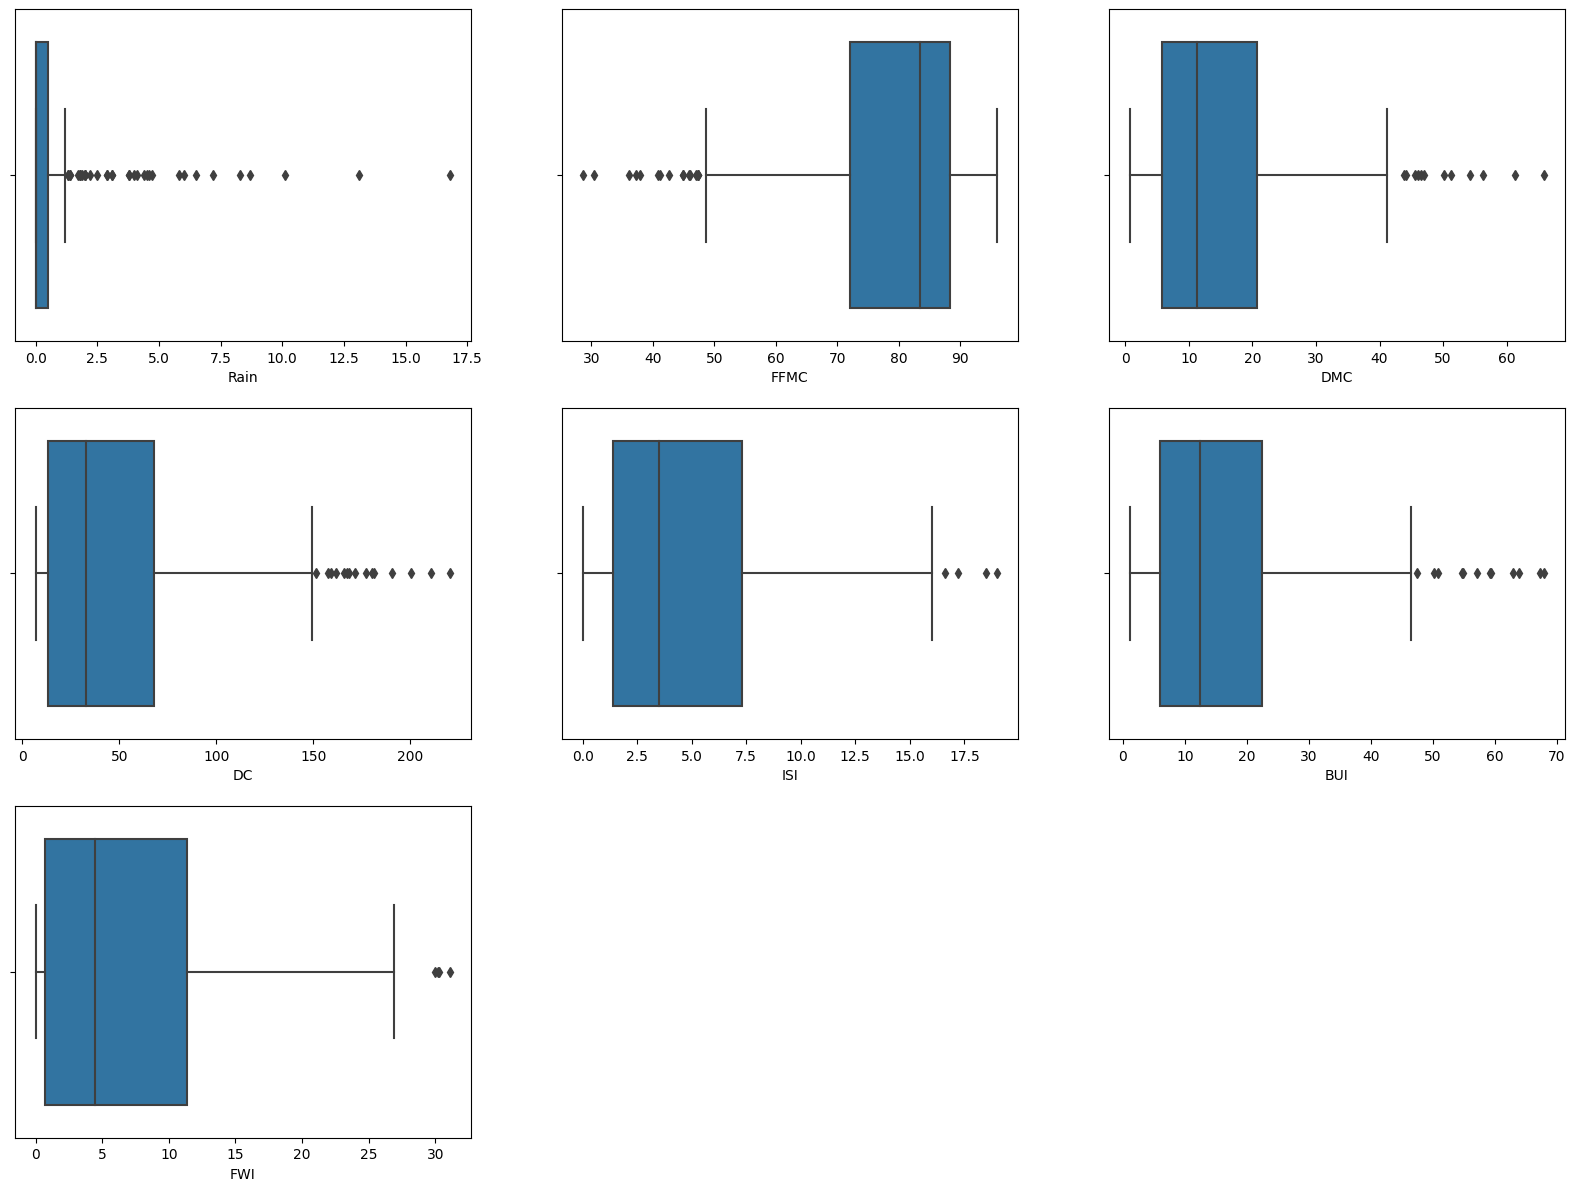

In [93]:
lst = ['Rain','FFMC','DMC','DC','ISI','BUI','FWI']
plt.figure(figsize=(20,25))
for i in enumerate(lst):
    plt.subplot(5,3,i[0]+1)
    sns.boxplot(data=df,x=lst[i[0]])

### Change datatype of Classes
* not fire =  0
* fire = 1

In [103]:
df['Classes'] = df['Classes'].str.replace('not fire','1')
df['Classes'] = df['Classes'].str.replace('fire','0')
df['Classes'] = df['Classes'].astype('int')

### COPY data for Regression

In [105]:
df_copy = df

In [106]:
df_copy.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,1,0
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,1,0
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,1,0
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,1,0
4,5,6,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,1,0


In [107]:
df_copy.columns

Index(['day', 'month', 'year', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes', 'Region'],
      dtype='object')

In [108]:
X = df_copy.drop('Temperature',axis=1)
y = df_copy['Temperature']

In [109]:
X

,day,month,year,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,2012,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,1,0
1,2,6,2012,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,1,0
2,3,6,2012,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,1,0
3,4,6,2012,89,13,2.5,28.6,1.3,6.9,0,1.7,0,1,0
4,5,6,2012,77,16,0,64.8,3,14.2,1.2,3.9,0.5,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
239,26,9,2012,65,14,0,85.4,16,44.5,4.5,16.9,6.5,0,1
240,27,9,2012,87,15,4.4,41.1,6.5,8,0.1,6.2,0,1,1
241,28,9,2012,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,1,1
242,29,9,2012,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,1,1


In [110]:
y

0      29
1      29
2      26
3      25
4      27
       ..
239    30
240    28
241    27
242    24
243    24
Name: Temperature, Length: 244, dtype: int64

In [111]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.33,random_state=42)

In [112]:
X_train

,day,month,year,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
114,23,9,2012,54,11,0.5,73.7,7.9,30.4,1.2,9.6,0.7,1,0
65,5,8,2012,65,13,0,86.8,11.1,29.7,5.2,11.5,6.1,0,0
132,11,6,2012,42,21,0,90.6,18.2,30.5,13.4,18,16.7,0,1
207,25,8,2012,40,18,0,92.1,56.3,157.5,14.3,59.5,31.1,0,1
162,11,7,2012,56,15,2.9,74.8,7.1,9.5,1.6,6.8,0.8,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
106,15,9,2012,82,15,0.4,44.9,0.9,7.3,0.2,1.4,0,1,0
14,15,6,2012,80,17,3.1,49.4,3,7.4,0.4,3,0.1,1,0
92,1,9,2012,76,17,7.2,46,1.3,7.5,0.2,1.8,0.1,1,0
179,28,7,2012,57,16,0,87.5,15.7,37.6,6.7,15.7,9,0,1


In [113]:
X_test

,day,month,year,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
24,25,6,2012,64,15,0,86.7,14.2,63.8,5.7,18.3,8.4,0,0
6,7,6,2012,54,13,0,88.2,9.9,30.5,6.4,10.9,7.2,0,0
153,2,7,2012,48,16,0,87.6,7.9,17.8,6.8,7.8,6.4,0,1
211,29,8,2012,53,17,0.5,80.2,20.7,149.2,2.7,30.6,5.9,0,1
198,16,8,2012,41,10,0.1,92,22.6,65.1,9.5,24.2,14.8,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
180,29,7,2012,59,16,0,88.1,19.5,47.2,7.4,19.5,10.9,0,1
5,6,6,2012,67,14,0,82.6,5.8,22.2,3.1,7,2.5,0,0
56,27,7,2012,48,13,0,90.3,22.2,108.5,8.7,29.4,15.3,0,0
125,4,6,2012,64,14,0,79.4,5.2,15.4,2.2,5.6,1,1,1


In [114]:
y_train

114    32
65     34
132    31
207    34
162    34
       ..
106    24
14     28
92     25
179    33
102    30
Name: Temperature, Length: 163, dtype: int64

In [115]:
y_test

24     31
6      33
153    33
211    35
198    40
       ..
180    34
5      31
56     36
125    30
148    36
Name: Temperature, Length: 81, dtype: int64

In [116]:
#Standardize or feature scaling the datasets 
from sklearn.preprocessing import StandardScaler 
scaler = StandardScaler()

In [117]:
scaler

StandardScaler()

In [118]:
X_train = scaler.fit_transform(X_train)

In [119]:
X_train

array([[ 0.84447703,  1.3826723 ,  0.        , ..., -0.8196431 ,
         1.04390785, -0.99388373],
       [-1.19310159,  0.48116996,  0.        , ..., -0.08219052,
        -0.95793896, -0.99388373],
       [-0.51390872, -1.32183472,  0.        , ...,  1.36540157,
        -0.95793896,  1.0061539 ],
       ...,
       [-1.64589683,  1.3826723 ,  0.        , ..., -0.90158227,
         1.04390785, -0.99388373],
       [ 1.41047108, -0.42033238,  0.        , ...,  0.31384882,
        -0.95793896,  1.0061539 ],
       [-0.51390872,  1.3826723 ,  0.        , ..., -0.87426921,
         1.04390785, -0.99388373]])

In [120]:
X_test = scaler.transform(X_test)

In [121]:
X_test

array([[ 1.07087465, -1.32183472,  0.        , ...,  0.23190965,
        -0.95793896, -0.99388373],
       [-0.96670396, -1.32183472,  0.        , ...,  0.0680313 ,
        -0.95793896, -0.99388373],
       [-1.53269802, -0.42033238,  0.        , ..., -0.04122093,
        -0.95793896,  1.0061539 ],
       ...,
       [ 1.29727227, -0.42033238,  0.        , ...,  1.17421016,
        -0.95793896, -0.99388373],
       [-1.3063004 , -1.32183472,  0.        , ..., -0.77867351,
         1.04390785,  1.0061539 ],
       [ 1.29727227, -1.32183472,  0.        , ...,  0.7235447 ,
        -0.95793896,  1.0061539 ]])

In [122]:
from sklearn.linear_model import LinearRegression

In [123]:
regression = LinearRegression()
regression

LinearRegression()

In [124]:
regression.fit(X_train,y_train)

LinearRegression()

In [125]:
## Print the coefficients and the intercept 
print(regression.coef_)

[-6.29946839e-01 -3.30806923e-01  9.99200722e-16 -9.68152302e-01
 -5.57690535e-01  2.36452852e-01  1.90585623e+00  9.33805925e-01
  1.17296981e+00  4.45810030e-02 -1.35995788e+00  1.97724938e-01
  2.52309217e-01  8.34562604e-02]


In [126]:
print(regression.intercept_)

31.98159509202454


In [127]:
## Prediction for the test data 
reg_pred = regression.predict(X_test)
reg_pred

array([32.86982262, 34.97907511, 34.71895423, 32.93220734, 36.64866482,
       32.00281859, 35.27819508, 28.49312857, 31.84450923, 29.27704091,
       29.06704133, 33.07364481, 32.4667427 , 32.7008168 , 34.32599535,
       31.80453584, 37.01042617, 25.23211237, 32.73196597, 33.38253854,
       31.55571716, 28.30699286, 34.23615097, 29.30603632, 36.93126913,
       24.98756128, 33.51228222, 33.57587507, 33.35705604, 35.40329932,
       33.767112  , 31.85221582, 32.40507656, 33.11736397, 32.44972087,
       31.46599605, 30.34784931, 34.2239929 , 32.37589956, 21.74277219,
       33.82900884, 34.85103093, 31.20651563, 24.69868309, 36.17424894,
       32.81796744, 31.22635993, 30.67357508, 35.1950892 , 34.29311524,
       36.98975313, 30.97884914, 30.95678802, 34.6655222 , 33.46814569,
       32.38222097, 36.65227179, 30.589826  , 30.97603618, 36.10290928,
       33.94615809, 28.43783118, 33.17776773, 31.78923636, 31.99593987,
       24.12810241, 33.39123143, 29.76320324, 36.80847578, 34.34

Text(0, 0.5, 'Test Peredicted data ')

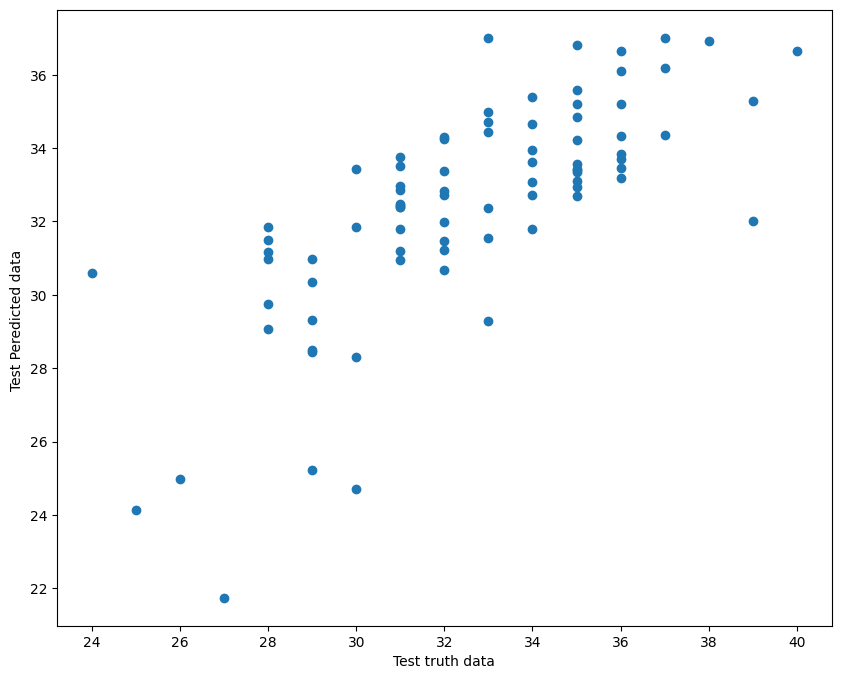

In [158]:
fig = plt.figure(figsize=(10,8))
plt.scatter(y_test,reg_pred)
plt.xlabel("Test truth data")
plt.ylabel("Test Peredicted data")

In [159]:
## residuals 
residuals = y_test - reg_pred
residuals

24    -1.869823
6     -1.979075
153   -1.718954
211    2.067793
198    3.351335
         ...   
180    1.274202
5     -1.960397
56     0.798390
125   -3.430249
148    2.306835
Name: Temperature, Length: 81, dtype: float64

<Figure size 1000x800 with 0 Axes>

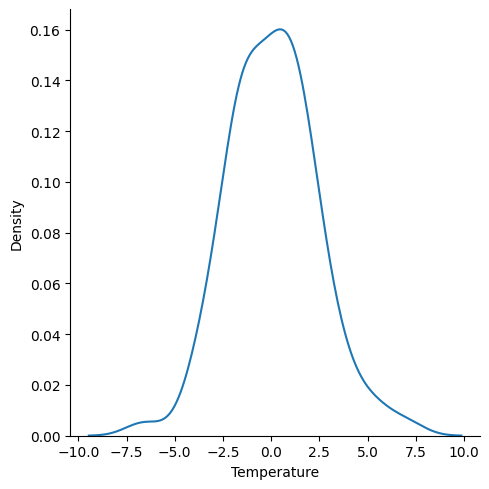

In [160]:
fig = plt.figure(figsize=(10,8))
sns.displot(residuals,kind='kde')

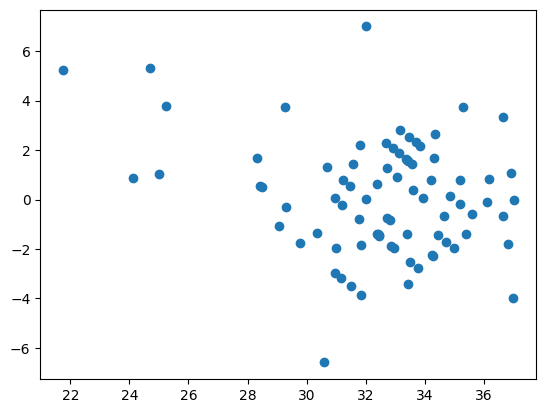

In [161]:
plt.scatter(reg_pred,residuals)

### MSE , MAE

In [162]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
print(mean_squared_error(y_test,reg_pred))
print(mean_absolute_error(y_test,reg_pred)) 
print(np.sqrt(mean_squared_error(y_test,reg_pred)))

5.250589940975308
1.805739430282254
2.2914165795366213


### R Square

In [163]:
from sklearn.metrics import r2_score
score = r2_score(y_test,reg_pred)
print(score)

0.5111519710126438


### Adjusted R Square

In [164]:
1 - (1-score)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)

0.40745693456078025

### Ridge

In [165]:
from sklearn.linear_model import Ridge
ridge=Ridge()

In [166]:
ridge.fit(X_train,y_train)

Ridge()

In [174]:
ridge.intercept_

31.98159509202454

In [175]:
ridge.coef_

array([-0.61752995, -0.3207458 ,  0.        , -0.98218457, -0.55467826,
        0.21315492,  1.84131702,  0.40094067,  0.87094221,  0.11396182,
       -0.48465778,  0.08466793,  0.24063909,  0.09187935])

In [177]:
rid_pred = ridge.predict(X_test)
rid_pred

array([32.85982748, 34.9149207 , 34.6801255 , 32.92998132, 36.61056862,
       32.05917754, 35.25499575, 28.51988807, 31.83679288, 29.28276684,
       29.06439442, 33.15037313, 32.44677748, 32.7322483 , 34.35814975,
       31.78754571, 36.91567124, 25.31324295, 32.67492302, 33.35526777,
       31.49765658, 28.29644553, 34.22316335, 29.30830796, 36.93224783,
       25.06526261, 33.48461631, 33.57641555, 33.35387649, 35.32860357,
       33.76792408, 31.83362797, 32.37993338, 33.16010038, 32.42109455,
       31.5078178 , 30.28919718, 34.25440049, 32.3007279 , 21.86171205,
       33.83192673, 34.81983629, 31.24261825, 24.76831106, 36.10419592,
       32.77320818, 31.21807666, 30.69260083, 35.1742616 , 34.29037291,
       36.93483074, 30.9447582 , 30.97755205, 34.71719979, 33.43904851,
       32.52070875, 36.64973602, 30.62216011, 30.9696123 , 36.10416977,
       33.88939183, 28.47020463, 33.13493675, 31.7769902 , 32.00695307,
       24.17731957, 33.37004249, 29.76297127, 36.78001537, 34.39

Text(0, 0.5, 'Test Peredicted data')

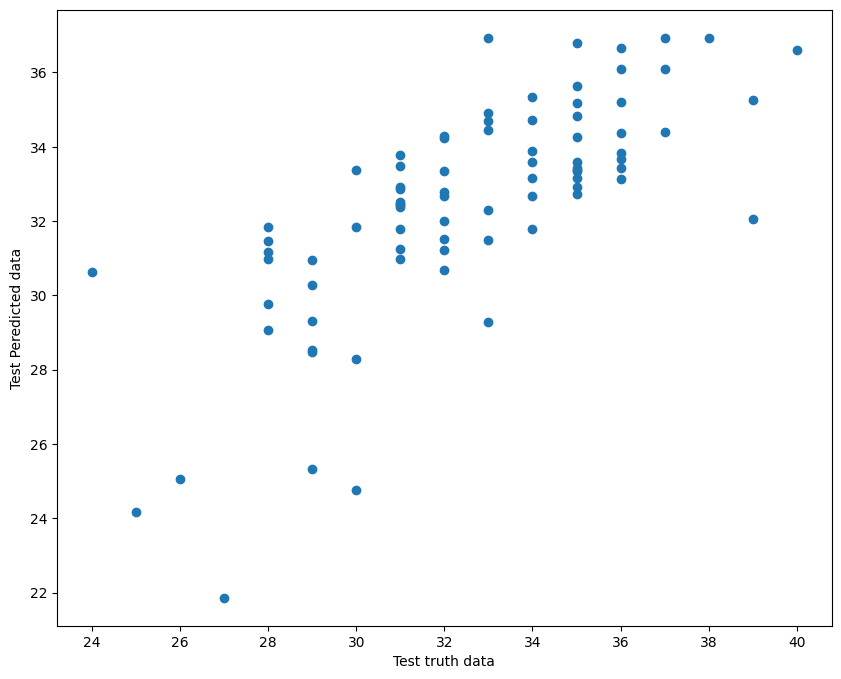

In [179]:
fig = plt.figure(figsize=(10,8))
plt.scatter(y_test,rid_pred)
plt.xlabel("Test truth data")
plt.ylabel("Test Peredicted data")

In [191]:
## residuals 
residuals1 = y_test - rid_pred
residuals1

24    -1.859827
6     -1.914921
153   -1.680125
211    2.070019
198    3.389431
         ...   
180    1.312404
5     -1.914806
56     0.799339
125   -3.383227
148    2.322513
Name: Temperature, Length: 81, dtype: float64

<Figure size 1000x800 with 0 Axes>

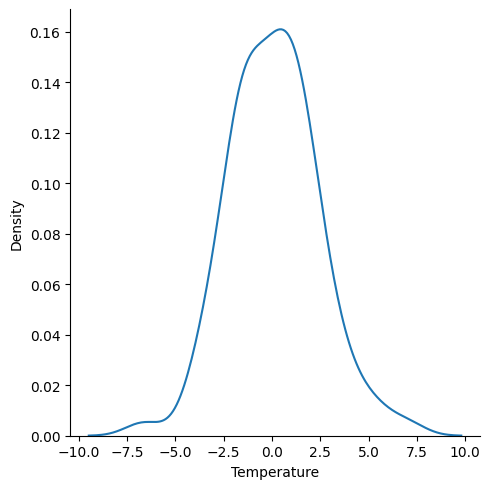

In [192]:
fig = plt.figure(figsize=(10,8))
sns.displot(residuals1,kind='kde')

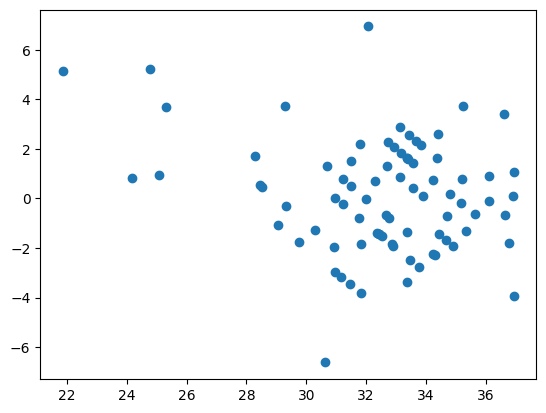

In [193]:
plt.scatter(rid_pred,residuals1)

In [214]:
print(mean_squared_error(y_test,rid_pred))
print(mean_absolute_error(y_test,rid_pred)) 
print(np.sqrt(mean_squared_error(y_test,rid_pred)))

5.1899058242074245
1.7972779430152257
2.2781364805927287


In [215]:
score = r2_score(y_test,rid_pred)
score

0.5168018715393088

In [216]:
1 - (1-score)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)

0.4143052988355258

### Lasso

In [217]:
from sklearn.linear_model import Lasso
lasso = Lasso()
lasso.fit(X_train,y_train)

Lasso()

In [218]:
las_pred = lasso.predict(X_test)
las_pred 

array([32.78381104, 33.3358205 , 33.53835729, 32.69192045, 34.21212444,
       31.67725854, 34.06518855, 28.84685412, 30.99078013, 30.10392027,
       31.06631475, 32.42020469, 32.80398907, 32.31726957, 33.37068778,
       32.46976122, 34.57875298, 27.38502889, 32.29240264, 33.12192792,
       31.62499111, 29.79900395, 33.65042591, 30.31559056, 34.62053146,
       28.73534108, 32.5527626 , 32.85187888, 32.99739235, 33.91411932,
       33.25917474, 31.27076256, 32.79238897, 32.82670067, 32.58151856,
       32.71432078, 31.4254765 , 33.30564213, 31.04995877, 28.31033379,
       32.79596672, 32.94981382, 32.61305239, 27.48796401, 34.24588058,
       32.5549849 , 31.88399562, 30.89031162, 34.19107957, 33.50571231,
       34.39861652, 31.81203876, 31.79074958, 32.97252542, 33.46393383,
       32.11393291, 34.88311373, 32.60669677, 31.06489233, 34.43070593,
       33.14932842, 31.16313854, 33.31119788, 32.23069043, 32.12966634,
       27.92377153, 33.05552681, 31.68837004, 34.34770454, 34.11

Text(0, 0.5, 'Test Peredicted data')

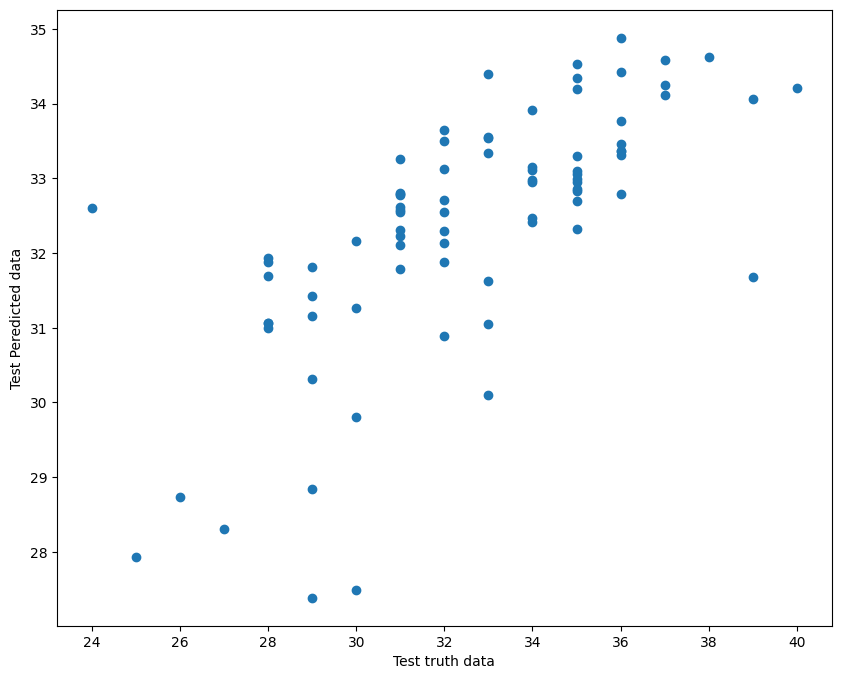

In [219]:
fig = plt.figure(figsize=(10,8))
plt.scatter(y_test,la_pred)
plt.xlabel("Test truth data")
plt.ylabel("Test Peredicted data")

In [220]:
## residuals 
residuals2 = y_test - las_pred
residuals2

24    -1.783811
6     -0.335821
153   -0.538357
211    2.308080
198    5.787876
         ...   
180    0.884428
5     -1.305114
56     2.230039
125   -2.157622
148    2.629312
Name: Temperature, Length: 81, dtype: float64

<Figure size 1000x800 with 0 Axes>

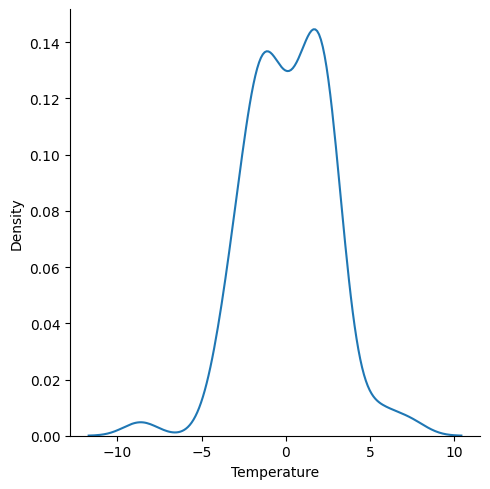

In [221]:
fig = plt.figure(figsize=(10,8))
sns.displot(residuals2,kind='kde')

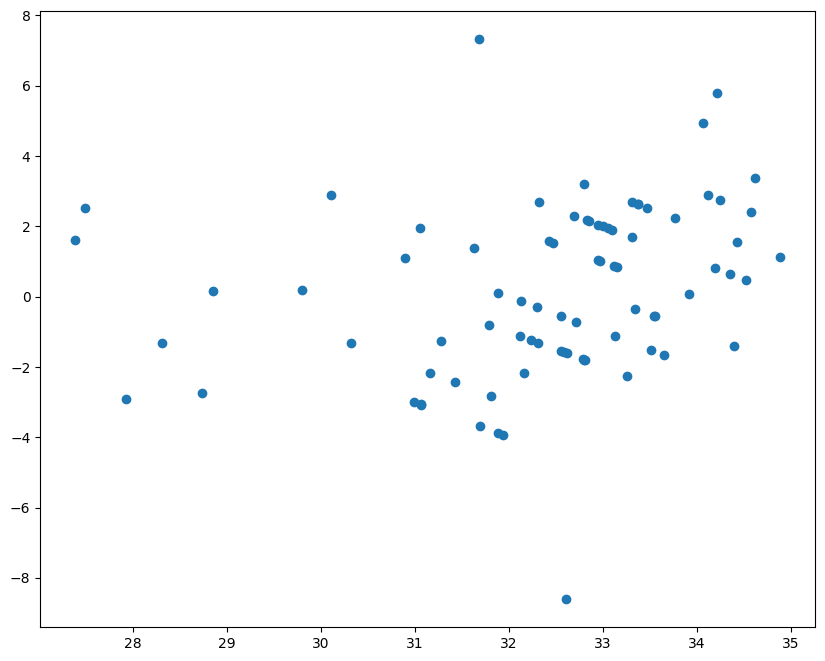

In [229]:
fig = plt.figure(figsize=(10,8))
plt.scatter(las_pred,residuals2)

In [230]:
print(mean_squared_error(y_test,las_pred))
print(mean_absolute_error(y_test,las_pred)) 
print(np.sqrt(mean_squared_error(y_test,las_pred)))

6.085458745527471
1.9978776414662665
2.4668722596696147


In [231]:
score = r2_score(y_test,las_pred)
score

0.4334228064508907

In [232]:
1 - (1-score)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)

0.3132397653950191

### ElasticNet

In [233]:
from sklearn.linear_model import ElasticNet
elastic = ElasticNet(random_state=0)
elastic.fit(X_train,y_train)

ElasticNet(random_state=0)

In [234]:
ela_pred = elastic.predict(X_test)
ela_pred 

array([32.70014869, 33.29910099, 33.41026626, 32.61092932, 34.7047485 ,
       31.58360838, 34.21527053, 29.02563256, 30.73347022, 30.11039166,
       30.41277398, 32.24275851, 32.49689882, 32.11572726, 33.82943086,
       32.26602144, 35.60101706, 27.89264401, 32.12951491, 32.95265792,
       31.02735367, 29.65251053, 33.71392821, 30.09882338, 35.36763797,
       28.87850096, 32.39310489, 32.86323328, 32.70140428, 34.17896096,
       33.34379291, 31.19918174, 32.72501691, 33.05000354, 32.11073799,
       32.39596102, 30.82655691, 33.29618332, 31.03905163, 27.97071052,
       32.81078878, 32.83085009, 32.18944481, 27.83881794, 34.71347157,
       32.40467835, 31.69547324, 30.73847724, 34.32027173, 33.61283179,
       35.5799204 , 31.38989764, 31.57088417, 33.58592157, 33.61999323,
       32.2560815 , 36.04767586, 32.00594323, 30.83622131, 34.89715148,
       33.0854042 , 30.78738109, 33.49083492, 31.9555529 , 31.71431021,
       27.98432489, 32.99835463, 31.35802614, 35.34742765, 34.17

Text(0, 0.5, 'Test Peredicted data')

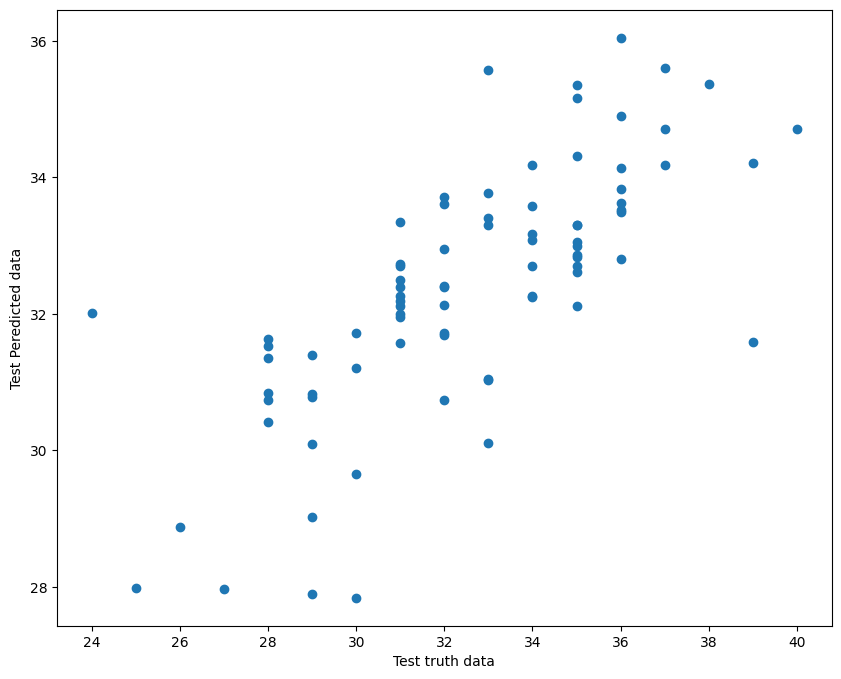

In [235]:
fig = plt.figure(figsize=(10,8))
plt.scatter(y_test,ela_pred)
plt.xlabel("Test truth data")
plt.ylabel("Test Peredicted data")

In [236]:
## residuals 
residuals3 = y_test - ela_pred
residuals3

24    -1.700149
6     -0.299101
153   -0.410266
211    2.389071
198    5.295251
         ...   
180    0.831457
5     -1.003679
56     1.867206
125   -1.721239
148    2.476763
Name: Temperature, Length: 81, dtype: float64

<Figure size 1000x800 with 0 Axes>

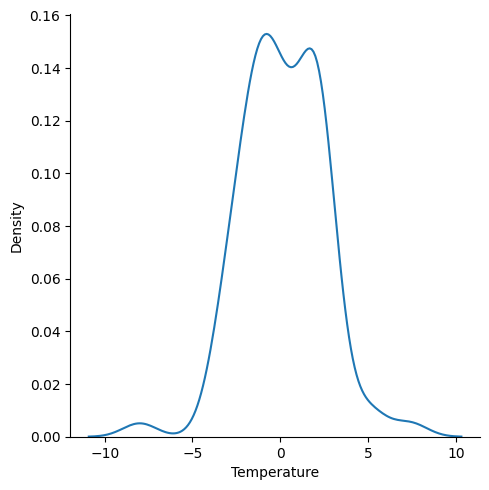

In [237]:
fig = plt.figure(figsize=(10,8))
sns.displot(residuals3,kind='kde')

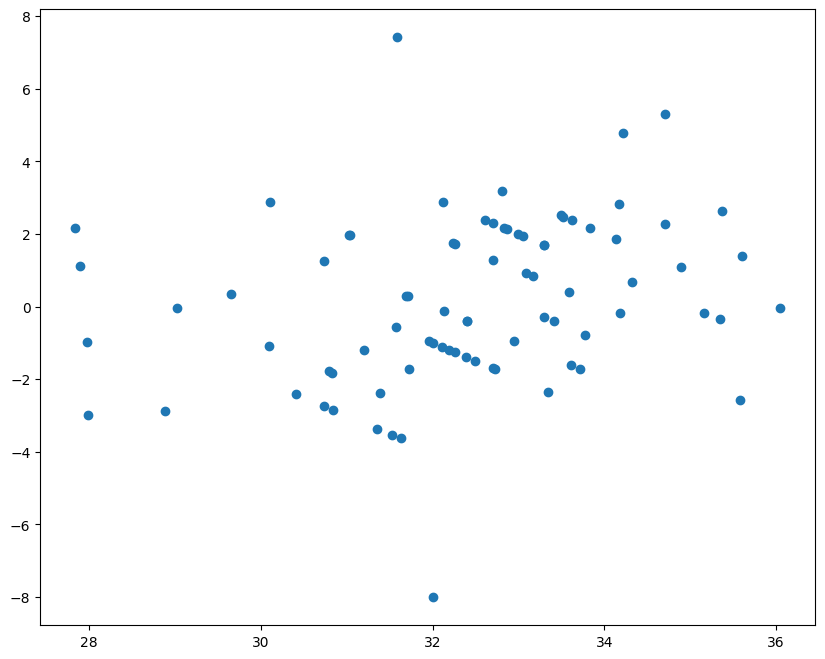

In [239]:
fig = plt.figure(figsize=(10,8))
plt.scatter(ela_pred,residuals3)

In [240]:
print(mean_squared_error(y_test,ela_pred))
print(mean_absolute_error(y_test,ela_pred)) 
print(np.sqrt(mean_squared_error(y_test,ela_pred)))

5.388789584891887
1.8473243979676643
2.3213766572643673


In [241]:
score = r2_score(y_test,ela_pred)
score

0.4982851076135141

In [242]:
1 - (1-score)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)

0.3918607365012292